In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
import pcmdpy as ppy
%matplotlib inline

In [2]:
plt.style.use('cook')

In [3]:
f = ppy.instrument.default_ngc3377_filters()
iso_model = ppy.isochrones.Isochrone_Model(f)

In [4]:
driv = ppy.driver.Driver(iso_model)

GPU acceleration not available. Continuing without.

# Poisson Sampling

In [5]:
g1 = ppy.galaxy.TauFull(np.array([0., -2., 4., 1., 30.]))
g2 = ppy.galaxy.TauFull(np.array([0., -2., 4., 5., 30.]))

In [6]:
imf1, mags = iso_model.model_galaxy(g1)
imf2, mags = iso_model.model_galaxy(g2)

In [7]:
# idx_sort = np.argsort(mags[0])
# mags = mags[:, idx_sort]
# imf1 = imf1[idx_sort]
# imf2 = imf2[idx_sort]

Text(0.5, 0, 'Relative Frequency (log)')

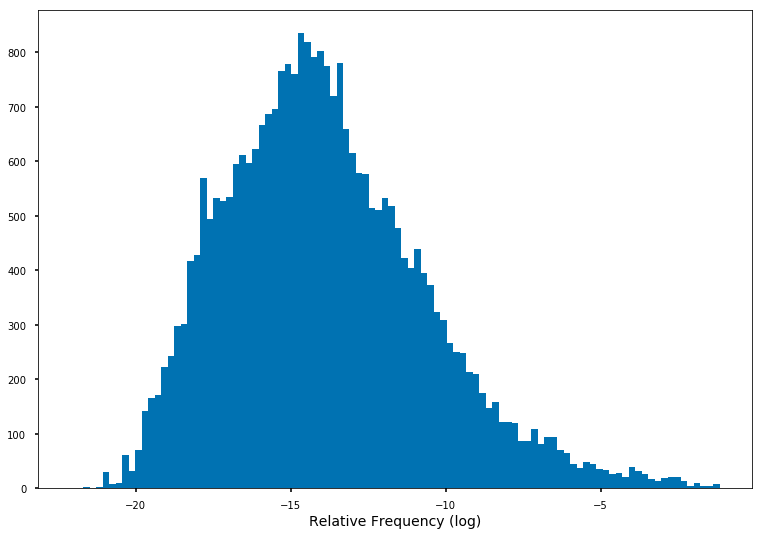

In [8]:
plt.hist(np.log10(imf1/imf1.sum()), bins=100);
plt.xlabel('Relative Frequency (log)')

Text(0.5, 0, 'Magnitude')

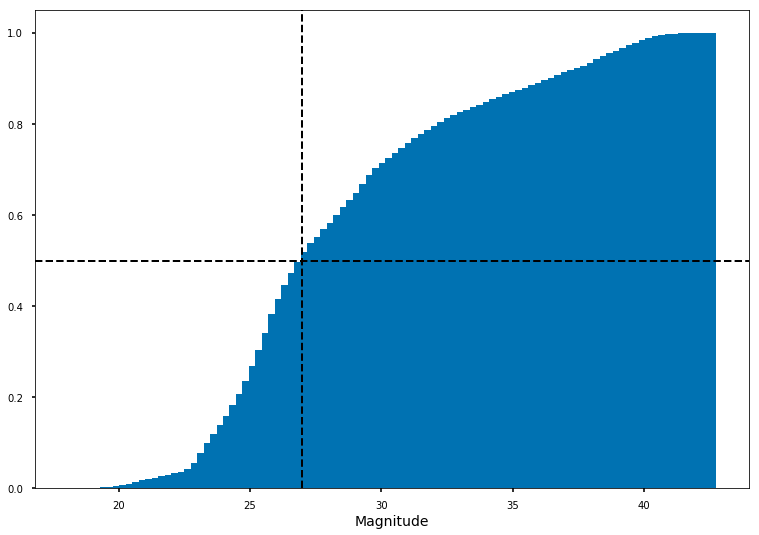

In [9]:
plt.hist(mags[0], bins=100, cumulative=True, density=True);
plt.axhline(y=0.5, ls='--', color='k')
plt.axvline(x=np.median(mags[0]), ls='--', color='k')
plt.xlabel('Magnitude')

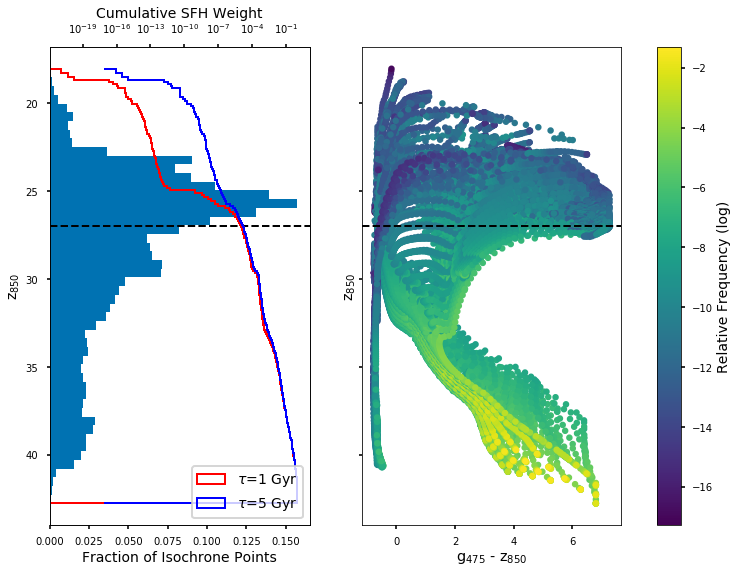

In [10]:
fig, axes = plt.subplots(ncols=2, gridspec_kw={'width_ratios': [0.5, 0.5]}, sharey=True)
plt.subplot(axes[1])
plt.scatter(mags[1]-mags[0], mags[0], s=20, c=np.log10(imf2/imf2.sum()))
for a in axes:
    a.axhline(y=np.median(mags[0]), ls='--', color='k')
ppy.plotting.plot_isochrone(iso_model, axes=axes[1], alpha=0.)
axes[0].hist(mags[0], orientation='horizontal', bins=50, density=True)
axes[0].set_xlabel('Fraction of Isochrone Points')
ax3 = axes[0].twiny()
# axes[0].hist(mags[0], orientation='horizontal', bins=200, cumulative=True, histtype='step', color='k', ls='-', log=True, density=True)
ax3.hist(mags[0], orientation='horizontal', bins=200, cumulative=True, weights=imf1, density=True, color='r', log=True, histtype='step', label=r'$\tau$=1 Gyr')
ax3.hist(mags[0], orientation='horizontal', bins=200, cumulative=True, weights=imf2, density=True, color='b', log=True, histtype='step', label=r'$\tau$=5 Gyr')
ax3.legend(loc=4)
ax3.set_xscale('log')
ax3.set_xlabel('Cumulative SFH Weight')
axes[0].set_ylabel(f[0].tex_name)
plt.colorbar(ax=axes, label='Relative Frequency (log)')

# Resampling Noise

In [25]:
g3 = ppy.galaxy.SSPSimple(np.array([0., -2., 4., 10.]))

In [26]:
%%time
pcmd1, _ = driv.simulate(g3, 256, Nnoise=1)

CPU times: user 1.44 s, sys: 276 ms, total: 1.71 s
Wall time: 1.73 s


In [27]:
%%time
pcmd2, _ = driv.simulate(g3, 256, Nnoise=100)

CPU times: user 2.85 s, sys: 413 ms, total: 3.26 s
Wall time: 3.31 s


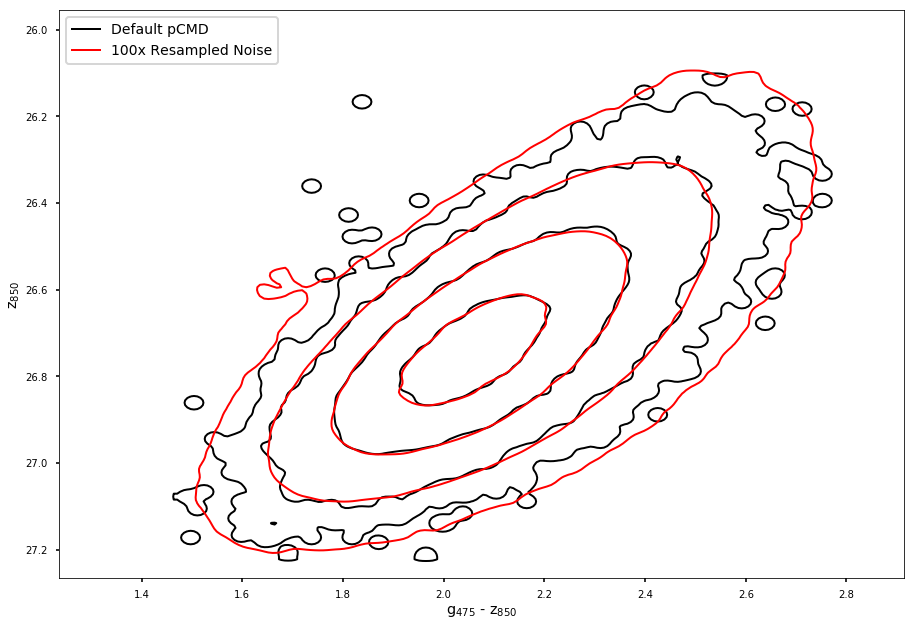

In [32]:
fig, ax = plt.subplots()
ppy.plotting.plot_pcmd_contours(pcmd1, ax=ax, color='k', label='Default pCMD')
ppy.plotting.plot_pcmd_contours(pcmd2, ax=ax, color='r', label='100x Resampled Noise')
ppy.plotting.plot_isochrone(iso_model, axes=ax, alpha=0.)
ax.legend(loc=2)
plt.tight_layout()

In [34]:
%%timeit
np.random.poisson(lam=0.01, size=10000000)

247 ms ± 17.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [36]:
%%timeit
np.random.poisson(lam=10000, size=10000000)

659 ms ± 3.14 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [37]:
%%timeit
np.random.normal(size=10000000)

372 ms ± 3.58 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
